In [2]:
import pandas as pd
import matplotlib as plt
import numpy as np

In [26]:
df = pd.read_table('TensionLab.txt', delim_whitespace=True)
df = df.drop(columns="Displ(mm)")
print(df)

      Force(N)  Strain(%)
0            3   0.000267
1            3   0.000133
2            3   0.000267
3            3   0.000267
4            3   0.000267
...        ...        ...
1271     17285   3.500000
1272     17075   3.500000
1273     16862   3.500000
1274     16625   3.500000
1275       -37   3.500000

[1276 rows x 2 columns]


<Axes: xlabel='Strain(%)', ylabel='Force(N)'>

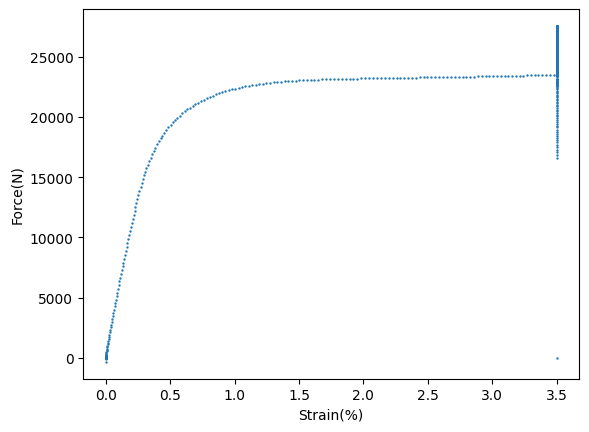

In [27]:
#making scatter plot to show raw data
df.plot.scatter(1,0, s=0.5)

In [28]:
#getting Stress- divide force by cross sectional area
#diameter = 6.35mm
#cross sectional area = 31.67 mm^2
df["Force(N)"] = df["Force(N)"].div(31.67)
print(df)

        Force(N)  Strain(%)
0       0.094727   0.000267
1       0.094727   0.000133
2       0.094727   0.000267
3       0.094727   0.000267
4       0.094727   0.000267
...          ...        ...
1271  545.784654   3.500000
1272  539.153773   3.500000
1273  532.428165   3.500000
1274  524.944743   3.500000
1275   -1.168298   3.500000

[1276 rows x 2 columns]


In [29]:
df["Strain(%)"] = df["Strain(%)"].div(100)
print(df)

        Force(N)  Strain(%)
0       0.094727   0.000003
1       0.094727   0.000001
2       0.094727   0.000003
3       0.094727   0.000003
4       0.094727   0.000003
...          ...        ...
1271  545.784654   0.035000
1272  539.153773   0.035000
1273  532.428165   0.035000
1274  524.944743   0.035000
1275   -1.168298   0.035000

[1276 rows x 2 columns]


In [30]:
df = df.rename(columns = {"Force(N)":"Stress(MPa)","Strain(%)":"Strain(fraction)"})
print(df)

      Stress(MPa)  Strain(fraction)
0        0.094727          0.000003
1        0.094727          0.000001
2        0.094727          0.000003
3        0.094727          0.000003
4        0.094727          0.000003
...           ...               ...
1271   545.784654          0.035000
1272   539.153773          0.035000
1273   532.428165          0.035000
1274   524.944743          0.035000
1275    -1.168298          0.035000

[1276 rows x 2 columns]


<Axes: xlabel='Strain(fraction)'>

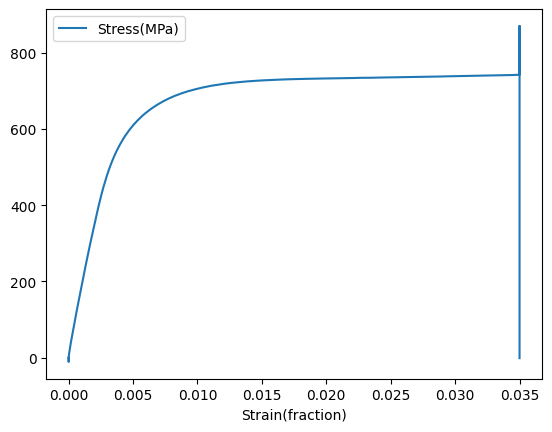

In [31]:
df.plot(x='Strain(fraction)', y='Stress(MPa)')

<Axes: xlabel='Strain(fraction)'>

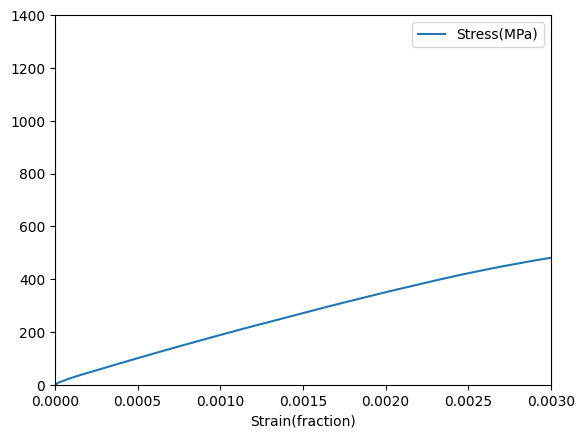

In [32]:
df.plot(x='Strain(fraction)', y='Stress(MPa)', xlim=(0,0.003), ylim=(0,1400))

In [33]:
#calculating young's modulus
polyfitdf = df[df['Strain(fraction)'] <= 0.003]
x = polyfitdf['Strain(fraction)']
y = polyfitdf['Stress(MPa)']
youngs = np.polyfit(x, y, 1)
print(youngs)

[1.70386024e+05 4.62431921e+00]


In [ ]:
#so, y = (1.70*10^5)x + 4.62 
#1.7*10^5 is megapascals (N/mm2)
#means: 170.000 GPa
#actual is 193 GPa

In [48]:
#calculating 0.2% offset strain
offsetdf = df.copy
offsetdf['Strain(fraction)'] = offsetdf['Strain(fraction)'].add(0.002)
strainX = offsetdf['Strain(fraction)'].array
strainY = offsetdf['Stress(MPa)'].array
stressY = df['Stress(MPa)'].array
stressX = df['Strain(fraction)'].array
plt.pyplot.plot(strainX, strainY, stressX, stressY)

plt.pyplot.show()

      Stress(MPa)  Strain(fraction)
0        0.094727          0.020003
1        0.094727          0.020001
2        0.094727          0.020003
3        0.094727          0.020003
4        0.094727          0.020003
...           ...               ...
1271   545.784654          0.055000
1272   539.153773          0.055000
1273   532.428165          0.055000
1274   524.944743          0.055000
1275    -1.168298          0.055000

[1276 rows x 2 columns]
<bound method NDFrame.copy of       Stress(MPa)  Strain(fraction)
0        0.094727          0.020003
1        0.094727          0.020001
2        0.094727          0.020003
3        0.094727          0.020003
4        0.094727          0.020003
...           ...               ...
1271   545.784654          0.055000
1272   539.153773          0.055000
1273   532.428165          0.055000
1274   524.944743          0.055000
1275    -1.168298          0.055000

[1276 rows x 2 columns]>


TypeError: 'method' object is not subscriptable